# Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train[1].csv')
test=pd.read_csv('test[1].csv')

In [3]:
train.shape

(31647, 18)

In [4]:
test.shape

(13564, 17)

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

UNIVARIATE ANALYSIS

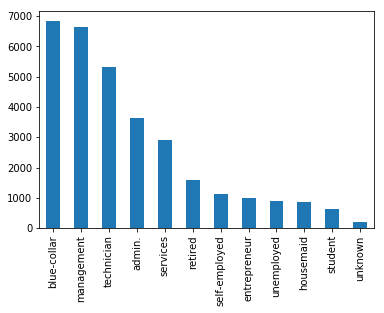

In [9]:
train['job'].value_counts().plot.bar()

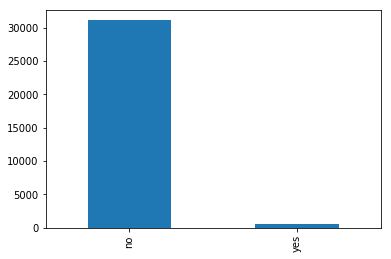

In [10]:
train['default'].value_counts().plot.bar()

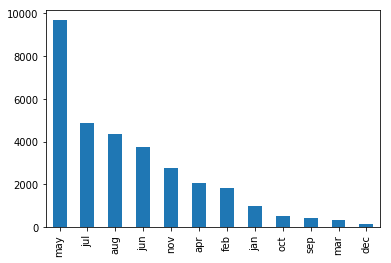

In [11]:
train['month'].value_counts().plot.bar()

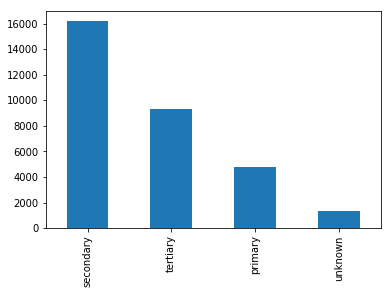

In [12]:
train['education'].value_counts().plot.bar()

BIVARIATE ANALYSIS

In [13]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


In [14]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

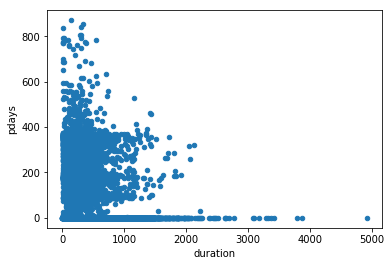

In [16]:
train.plot.scatter('duration','pdays')

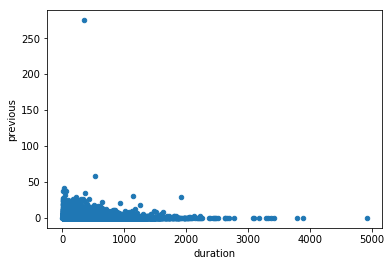

In [17]:
train.plot.scatter('duration','previous')

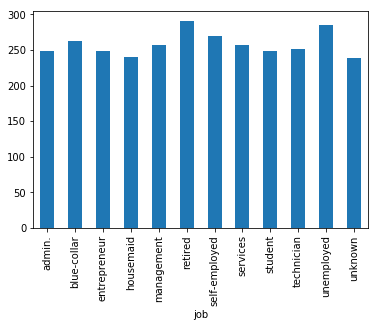

In [18]:
train.groupby('job')['duration'].mean().plot.bar()

In [19]:
train.groupby('job')['balance'].mean()

job
admin.           1111.109336
blue-collar      1069.550132
entrepreneur     1544.754960
housemaid        1469.773455
management       1755.432143
retired          2018.068615
self-employed    1700.780944
services         1022.295212
student          1412.192126
technician       1257.465235
unemployed       1497.725967
unknown          1626.378641
Name: balance, dtype: float64

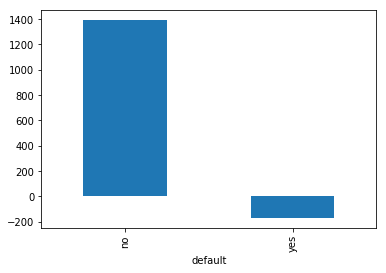

In [20]:
train.groupby("default")['balance'].mean().plot.bar()

T Test

In [21]:
from scipy.stats import ttest_ind

In [22]:
yes=train[train['default']=='yes']
no=train[train['default']=='no']

In [23]:
ttest_ind(yes['balance'],no['balance'])

Ttest_indResult(statistic=-12.379379105633618, pvalue=4.0758007470037007e-35)

It shows that the people whose balance are positive are less likely to default than those whose balance are negative.

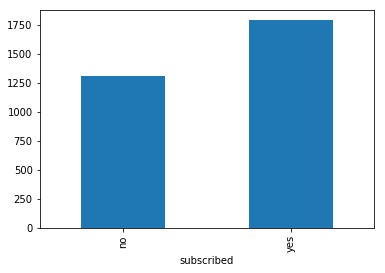

In [24]:
train.groupby('subscribed')['balance'].mean().plot.bar()

People with higher positive balance are more likely to subscribe.

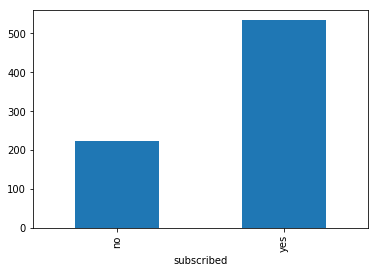

In [25]:
train.groupby('subscribed')['duration'].mean().plot.bar()

People whose talking duration is longer are more likely to subscribe.

In [26]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [27]:
pd.crosstab(train['education'],train['default'])

default,no,yes
education,,
primary,4723,85
secondary,15895,329
tertiary,9154,147
unknown,1290,24


In [28]:
from scipy.stats import chi2_contingency

In [29]:
chi2_contingency(pd.crosstab(train['education'],train['default']))

(6.735021600290129,
 0.08084065558908127,
 3,
 array([[ 4719.12332923,    88.87667077],
        [15924.09669163,   299.90330837],
        [ 9129.06948526,   171.93051474],
        [ 1289.71049389,    24.28950611]]))

The relation between education and default was not found to be very strong.

In [30]:
pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [31]:
chi2_contingency(pd.crosstab(train['default'],train['subscribed']))

(12.411008105369966,
 0.00042681039656274696,
 1,
 array([[27415.67238601,  3646.32761399],
        [  516.32761399,    68.67238601]]))

People with default history are less likely to subscibe.Also they should be avoided to offer subscription in the banks best interests.

In [32]:
pd.crosstab(train['subscribed'],train['loan'])

loan,no,yes
subscribed,,
no,23132,4800
yes,3384,331


# Model Building

In [33]:
y=train['subscribed']
train= train.drop('subscribed',axis=1)



In [34]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_val,y_train,y_val=train_test_split(train,y,test_size=0.2,random_state=5)

LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(x_train,y_train)

C:\Users\Win7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
pred=logreg.predict(x_val)

In [41]:
pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [55]:
logreg.score(x_val,y_val)

0.8998420221169037

The accuracy comes out to be about 90%.

DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
clf=DecisionTreeClassifier(max_depth=5)

In [58]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
pred=clf.predict(x_val)

In [60]:
pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [61]:
clf.score(x_train,y_train)

0.9140498479282695

In [62]:
clf.score(x_val,y_val)

0.9097946287519747

The accuracy of the model comes out to be about 91%.

In [63]:
test_pred=clf.predict(test)

In [64]:
submission=pd.DataFrame()

In [65]:
submission['ID']=test['ID']

In [66]:
submission['subscribed']=test_pred

In [67]:
submission.to_csv('submission.csv',header=True,index=False)